#Задание1

In [1]:
import torch
import math
def grad_e(w,x):
    x = x.clone()
    w = w.clone()
    w.requires_grad_(True)
    
    f = 1/(1+math.e**(w.matmul(x)))
    f.backward()
    return w.grad

In [2]:
grad_e(torch.tensor([1.,2.,3.]), torch.tensor([4.,5.,6.]))

tensor([-5.0657e-14, -6.3321e-14, -7.5985e-14])

#Задание 5

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['intel-image-classification', 'adult-income-dataset']


In [4]:
!ls ../input

adult-income-dataset  intel-image-classification


In [5]:
import torch
from torch import nn
from torchvision import datasets, models, transforms


In [6]:
import torch.utils.data as tdata

In [7]:
!ls ../input/intel-image-classification/seg_train/seg_train/
!ls ../input/intel-image-classification/seg_test/seg_test/

buildings  forest  glacier  mountain  sea  street
buildings  forest  glacier  mountain  sea  street


In [8]:
data_path_format = '../input/intel-image-classification/seg_{0}/seg_{0}'

In [9]:
np.random.seed(5315)
torch.manual_seed(9784)

In [10]:
# channel_means = (0.4301, 0.4572, 0.4540)
# channel_stds = (0.2698, 0.2680, 0.2983)  # 0.485, 0.456, 0.406
channel_means = (0.485, 0.456, 0.406)
channel_stds = (0.229, 0.224, 0.225)

In [11]:
image_transforms = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),
    transforms.Normalize(channel_means, channel_stds)
])
    

In [12]:
image_datasets = dict(zip(('dev', 'test'), [datasets.ImageFolder(data_path_format.format(key),transform=image_transforms) for key in ['train', 'test']]))
print(image_datasets)

{'dev': Dataset ImageFolder
    Number of datapoints: 14034
    Root Location: ../input/intel-image-classification/seg_train/seg_train
    Transforms (if any): Compose(
                             Resize(size=(150, 150), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
                         )
    Target Transforms (if any): None, 'test': Dataset ImageFolder
    Number of datapoints: 3000
    Root Location: ../input/intel-image-classification/seg_test/seg_test
    Transforms (if any): Compose(
                             Resize(size=(150, 150), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
                         )
    Target Transforms (if any): None}


In [13]:
devset_indices = np.arange(len(image_datasets['dev']))
devset_labels = image_datasets['dev'].targets

In [14]:
from sklearn import model_selection

In [15]:
train_indices, val_indices, train_labels,  val_labels = model_selection.train_test_split(devset_indices, devset_labels, test_size=0.1, stratify=devset_labels)

In [16]:
print(len(val_indices))

1404


In [17]:
image_datasets['train'] = tdata.Subset(image_datasets['dev'], train_indices)
image_datasets['validation'] = tdata.Subset(image_datasets['dev'], val_indices)

In [18]:
print(image_datasets)

{'dev': Dataset ImageFolder
    Number of datapoints: 14034
    Root Location: ../input/intel-image-classification/seg_train/seg_train
    Transforms (if any): Compose(
                             Resize(size=(150, 150), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
                         )
    Target Transforms (if any): None, 'test': Dataset ImageFolder
    Number of datapoints: 3000
    Root Location: ../input/intel-image-classification/seg_test/seg_test
    Transforms (if any): Compose(
                             Resize(size=(150, 150), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
                         )
    Target Transforms (if any): None, 'train': <torch.utils.data.dataset.Subset object at 0x7f4ab72bdb00>, 'validation': <torch.uti

In [19]:
from IPython.display import display

In [20]:
image_dataloaders = {key: tdata.DataLoader(image_datasets[key], batch_size=16,shuffle=True) for key in  ['train', 'validation']}

In [21]:
image_dataloaders['test'] = tdata.DataLoader(image_datasets['test'], batch_size=32)

In [22]:
def imshow(inp, title=None, fig_size=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0)) # C x H x W  # H x W x C
    inp = channel_stds * inp + channel_means
    inp = np.clip(inp, 0, 1)
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot('111')
    ax.imshow(inp)
    if title is not None:
        ax.set_title(title)
    ax.set_aspect('equal')
    plt.pause(0.001)  

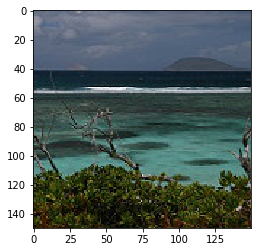

In [23]:
imshow(image_datasets['train'][8555][0]) # 5946

In [24]:
cuda_device = torch.device('cuda')
cpu_device = torch.device('cpu')
device = cuda_device

In [25]:
import torch.nn as F
class NewNet(nn.Module):
    def __init__(self):
        super(NewNet, self).__init__()
        #16 3 150 150
        self.conv1 = nn.Conv2d(3, 4, 3, padding=4)
        #16 4 156 156
        self.mpool1 = nn.MaxPool2d(2, 2)
        #16 4 78 78
        self.re1 = F.ReLU()
        self.conv2 = nn.Conv2d(4, 16, 3)
        #16 16 76 76
        self.mpool2 = nn.MaxPool2d(2, 2)
        #16 16 38 38
        self.re2 = F.ReLU()
        self.conv3 = nn.Conv2d(16, 64, 3)
        #16 64 36 36
        self.mpool3 = nn.MaxPool2d(2, 2)  
        #16 64 18 18
        self.re3 = F.ReLU()
        self.mpool4 = nn.MaxPool2d(2, 2)
        #16 64 9 9
        self.re4 = F.ReLU()
        self.conv5 = nn.Conv2d(64, 256, 3)
        #16 256 7 7
        self.re5 = F.ReLU()
        
        self.fc1 = nn.Linear(256*7*7, 50)
        self.fc2 = nn.Linear(50, 6)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.mpool1(x)
        x = self.re1(x)
        x = self.conv2(x)
        x = self.mpool2(x)
        x = self.re2(x)
        x = self.conv3(x)
        x = self.mpool3(x)
        x = self.re3(x)
        x = self.mpool4(x)
        x = self.re4(x)
        x = self.conv5(x)
        x = self.re5(x)
        x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x
ptr = NewNet()
ptr = ptr.to(device)

In [26]:
class BestModel:
    def __init__(self, path, initial_criterion):
        self.path = path
        self.criterion = initial_criterion
        
    def update(self, model, optimizer, criterion):
        self.criterion = criterion
        torch.save({'model_state': model.state_dict(), 'optimizer_state': optimizer.state_dict(), 'criterion': criterion}, self.path)
        
    def load_model_data(self):
        return torch.load(self.path)
    
    def restore(self, model, optimizer):
        model_data = self.load_model_data()
        model.load_state_dict(model_data['model_state'])
        optimizer.load_state_dict(model_data['optimizer_state'])

In [27]:
def train_model(epochs, model, optimizer, criterion, loaders, device, best_model, n_prints=1):
    print_every = len(loaders['train']) // n_prints
    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        
        for iteration, (xx, yy) in enumerate(loaders['train']):
            optimizer.zero_grad()
            xx, yy = xx.to(device), yy.to(device)
            out = model(xx)
            loss = criterion(out, yy)
            running_train_loss += loss.item()
            loss.backward()
            optimizer.step()
            
            if(iteration % print_every == print_every - 1):
                running_train_loss /= print_every
                print(f"Epoch {epoch}, iteration {iteration} training_loss {running_train_loss}")
                running_train_loss = 0.0
            
        with torch.no_grad():
            model.eval()
            running_corrects = 0
            running_total = 0
            running_loss = 0.0
            for xx, yy in loaders['validation']:
                batch_size = xx.size(0)
                xx, yy = xx.to(device), yy.to(device)

                out = model(xx)
                
                loss = criterion(out, yy)
                running_loss += loss.item()
                
                predictions = out.argmax(1)
                running_corrects += (predictions == yy).sum().item()
                running_total += batch_size
            
            mean_val_loss = running_loss / len(loaders['validation'])
            accuracy = running_corrects / running_total
            
            if accuracy > best_model.criterion:
                best_model.update(model, optimizer, accuracy)
            
            print(f"Epoch {epoch}, val_loss {mean_val_loss}, accuracy = {accuracy}")
    best_model.restore(model, optimizer)
                
                
            
        

In [28]:
import time
start = time.time()

In [29]:
optimizer = torch.optim.Adam(ptr.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
best_model = BestModel('resnet_data',0.0)
train_model(5, ptr, optimizer, criterion,image_dataloaders, device, best_model=best_model, n_prints=5)

Epoch 0, iteration 157 training_loss 1.2433397811424882
Epoch 0, iteration 315 training_loss 0.955648336229445
Epoch 0, iteration 473 training_loss 0.901977878959873
Epoch 0, iteration 631 training_loss 0.7790082485615453
Epoch 0, iteration 789 training_loss 0.7508686831857585
Epoch 0, val_loss 0.7268197678706863, accuracy = 0.7172364672364673
Epoch 1, iteration 157 training_loss 0.7240932020771352
Epoch 1, iteration 315 training_loss 0.7021122437111939
Epoch 1, iteration 473 training_loss 0.6756580460675156
Epoch 1, iteration 631 training_loss 0.6223958246881449
Epoch 1, iteration 789 training_loss 0.5950540825724602
Epoch 1, val_loss 0.5773423525758765, accuracy = 0.7813390313390314
Epoch 2, iteration 157 training_loss 0.5667149595256094
Epoch 2, iteration 315 training_loss 0.572163855161848
Epoch 2, iteration 473 training_loss 0.541050447693354
Epoch 2, iteration 631 training_loss 0.5491688114744199
Epoch 2, iteration 789 training_loss 0.5098868876318389
Epoch 2, val_loss 0.51057078

In [30]:
end = time.time()
print(end - start)

287.8752770423889


In [31]:
from torchvision.utils import make_grid

In [32]:
xx, yy = next(iter(image_dataloaders['validation']))

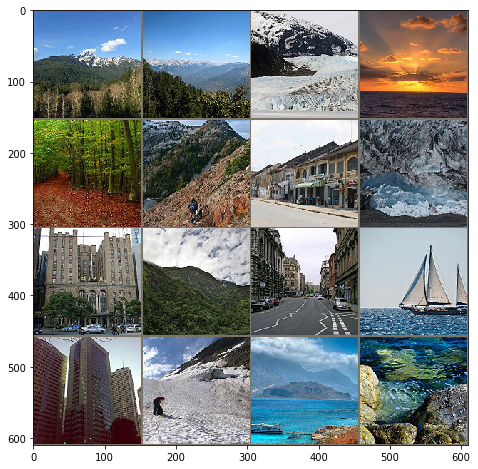

['mountain', 'mountain', 'glacier', 'sea', 'forest', 'mountain', 'buildings', 'glacier', 'buildings', 'mountain', 'street', 'sea', 'forest', 'glacier', 'sea', 'sea']
['mountain', 'mountain', 'glacier', 'sea', 'forest', 'mountain', 'buildings', 'glacier', 'buildings', 'mountain', 'street', 'sea', 'buildings', 'glacier', 'sea', 'sea']


In [33]:
ptr.eval()
out = ptr(xx.cuda())
preds = out.argmax(1)
predicted_classes = [image_datasets['dev'].classes[c] for c in preds]
actual_classes = [image_datasets['dev'].classes[c] for c in yy]
imshow(make_grid(xx, nrow=4), fig_size=(8,8))
print(predicted_classes)
print(actual_classes)

In [34]:
all_preds = []
correct_preds = []
with torch.no_grad():
    ptr.eval()
    for xx, yy in image_dataloaders['test']:
        xx = xx.to(device)
        output = ptr(xx)
        all_preds.extend(output.argmax(1).tolist())
        correct_preds.extend(yy.tolist())

In [35]:
from sklearn import metrics

In [36]:
all_preds = np.asarray(all_preds)
correct_preds = np.asarray(correct_preds)

In [37]:
target_names = image_datasets['test'].classes
print(metrics.classification_report(correct_preds, all_preds,target_names=target_names))

              precision    recall  f1-score   support

   buildings       0.87      0.74      0.80       437
      forest       0.92      0.97      0.95       474
     glacier       0.79      0.75      0.77       553
    mountain       0.68      0.85      0.76       525
         sea       0.84      0.79      0.81       510
      street       0.87      0.82      0.85       501

   micro avg       0.82      0.82      0.82      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.83      0.82      0.82      3000



In [38]:
confusion_matrix = metrics.confusion_matrix(correct_preds, all_preds)
pd.DataFrame(confusion_matrix, index=target_names, columns=target_names)

,buildings,forest,glacier,mountain,sea,street
buildings,325,12,7,25,17,51
forest,1,461,2,5,2,3
glacier,3,4,415,104,24,3
mountain,2,3,56,445,19,0
sea,6,3,33,63,402,3
street,35,18,13,9,14,412
